# Cat-Breed Classifier Using CNN

## 1. Aim
 is to buid a classifier to categorize the breed of cats into 4 types:   'Abyssian',   'Munchkin',    'Persian',   'Toyger' on feeding the input image of a cat using Convolutional Neural Network with Tensorflow.

Here is a link to refer a sample CNN implementation using TF: https://www.tensorflow.org/tutorials/images/cnn


## 2. Setup


In [2]:
#import the required libraries
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3.1 Loading Dataset:
  Let's load the dataset from the directory and store the path in variable.

  Here the hirerarchy is: 
    -
        

1.   Cat Breed Classifier
    1. Cat-Breed-Classifier.ipynb
    2. Dataset
          1. Training:: 
              -Abyssian -Munchkin -Persian -Tygor
          2. Validation::
              -Abyssian -Munchkin -Persian -Tygor


        
        
      

In [24]:
#collecting the path for base directory
base_dir='/content/drive/My Drive/Cat-Breed-Classifier/dataset/'
training_dir=os.path.join(base_dir, 'training')
validation_dir=os.path.join(base_dir, 'validation')

train_a_dir=os.path.join(training_dir,'abyssian')
train_m_dir=os.path.join(training_dir,'munchkin')
train_p_dir=os.path.join(training_dir,'persian')
train_t_dir=os.path.join(training_dir,'toyger')

valid_a_dir=os.path.join(validation_dir,'abyssian')
valid_m_dir=os.path.join(validation_dir,'munchkin')
valid_p_dir=os.path.join(validation_dir,'persian')
valid_t_dir=os.path.join(validation_dir,'toyger')


#Let's find out the total number of horse and human images in the directories:
print('total abyssian in training: ', len(os.listdir(train_a_dir)))
print('total munchkin in training: ', len(os.listdir(train_m_dir)))
print('total persian in training: ', len(os.listdir(train_p_dir)))
print('total toyger in training: ', len(os.listdir(train_t_dir)))

print('total abyssian in validation: ', len(os.listdir(valid_a_dir)))
print('total munchkin in validation: ', len(os.listdir(valid_m_dir)))
print('total persian in validation: ', len(os.listdir(valid_p_dir)))
print('total toyger in validation: ', len(os.listdir(valid_t_dir)))


total abyssian in training:  402
total munchkin in training:  300
total persian in training:  398
total toyger in training:  370
total abyssian in validation:  187
total munchkin in validation:  94
total persian in validation:  202
total toyger in validation:  117


## 3.2 One look at the dataset.


In [25]:
#let's see the files in the directories
train_a_names = os.listdir(train_a_dir)
print(train_a_names[:10])
train_m_names = os.listdir(train_m_dir)
print(train_m_names[:10])
train_p_names = os.listdir(train_p_dir)
print(train_p_names[:10])
train_t_names = os.listdir(train_t_dir)
print(train_t_names[:10])


validation_a_names = os.listdir(valid_a_dir)
print(validation_a_names[:10])
validation_m_names = os.listdir(valid_m_dir)
print(validation_m_names[:10])
validation_p_names = os.listdir(valid_p_dir)
print(validation_p_names[:10])
validation_t_names = os.listdir(valid_t_dir)
print(validation_t_names[:10])



['image27.jpeg', 'image0.jpeg', 'image19.jpeg', 'image4.jpeg', 'image5.jpeg', 'image28.jpeg', 'image20.jpeg', 'image3.jpeg', 'image29.jpeg', 'image9.jpeg']
['image16.jpeg', 'image10.jpeg', 'image6.jpeg', 'image7.jpeg', 'image9.jpeg', 'image8.jpeg', 'image14.jpeg', 'image3.jpeg', 'image12.jpeg', 'image15.jpeg']
['image22.jpeg', 'image13.jpeg', 'image19.jpeg', 'image11.jpeg', 'image7.jpeg', 'image20.jpeg', 'image21.jpeg', 'image18.jpeg', 'image5.jpeg', 'image9.jpeg']
['image14.jpeg', 'image21.jpeg', 'image16.jpeg', 'image20.jpeg', 'image10.jpeg', 'image8.jpeg', 'image9.jpeg', 'image19.jpeg', 'image15.jpeg', 'image3.jpeg']
['the-abyssinian.jpg', 'Abyssinian-Cat-Breed-Profile.jpg', 'Abyssinian-mom-cat-and-kitten.jpg', 'abyssinian-cats.jpg', 'abyssinian-cat_cat-breed_catdogfish_3000x3000-2-329x329.jpg', 'abyssinian-cat-B2GEMR.jpg', 'Abyssinian-cat.jpg', 'Untitled-design-49.png', '1-3.png', 'beautiful-cat37-1.jpg']
['image18.jpeg', 'image24.jpeg', 'image.jpeg', 'image19.jpeg', 'image2.jpeg',

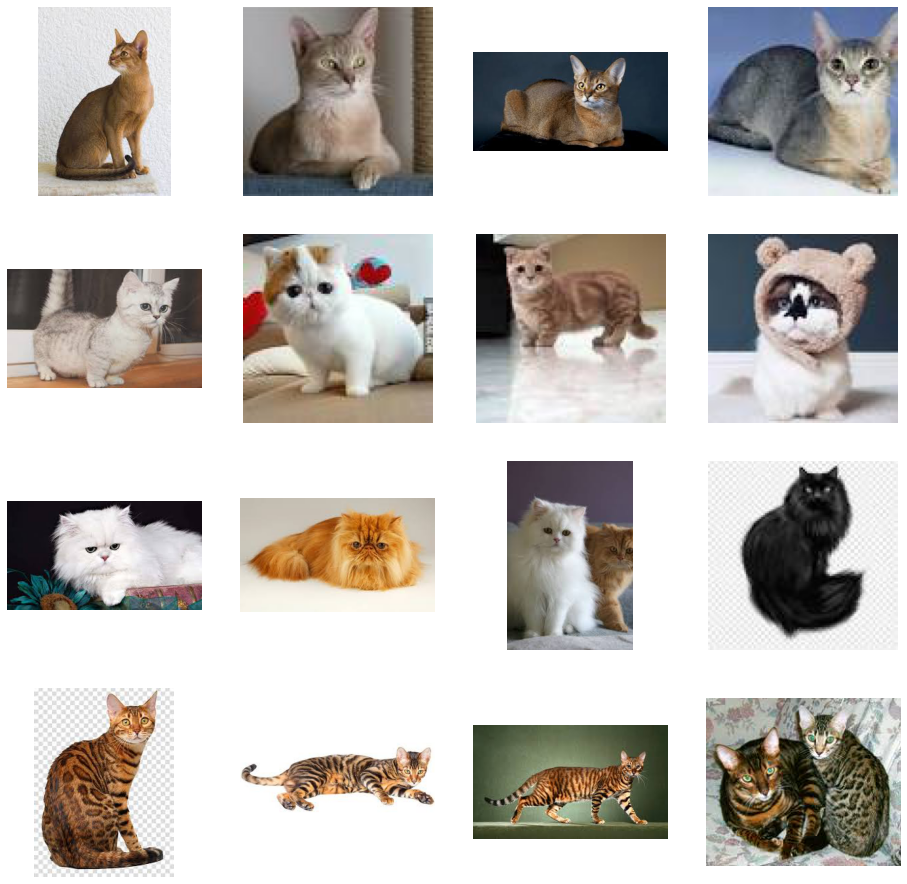

In [26]:
#Let's see the images present in the dataset.

import matplotlib.image as mpimg
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 4
next_a_pix = [os.path.join(train_a_dir, fname) 
                for fname in train_a_names[pic_index-4:pic_index]]
next_m_pix = [os.path.join(train_m_dir, fname) 
                for fname in train_m_names[pic_index-4:pic_index]]
next_p_pix = [os.path.join(train_p_dir, fname) 
                for fname in train_p_names[pic_index-4:pic_index]]
next_t_pix = [os.path.join(train_t_dir, fname) 
                for fname in train_t_names[pic_index-4:pic_index]]

for i, img_path in enumerate(next_a_pix+next_m_pix+next_p_pix+next_t_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#Abyssian
#Munchkin
#Persian
#Tygor

## 4. Building a Model
Let's create our sequential layers. 
Here's a tutorial link for the same :
http://keras.io/layers/convolutional/

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #after 6 layers we use flatten to create single vector along with activation function

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),

  #since it's a multi-class hence we'll use softmax activation function.

    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 21, 21, 64)       

In [0]:
#compiling the model by setting the type of classifier, optimizer, acc we want in output

#using the RMSprop optimization algorithm is preferable to stochastic 
#gradient descent (SGD), because RMSprop automates learning-rate tuning for us. 
model.compile(optimizer = RMSprop(lr=1e-4),
              loss = 'categorical_crossentropy',metrics=['accuracy'])


## 5. Data Preprocessing

Since the data we've can be of different size and pixes, hence we normalize the image before feeding it to the NN.


Training the model with the Augmented data on the way is really a productive way of getting better results. The augmentation trains the model on the various operaton performed on the image to increase the dataset without affecting the size of dataset.

In [30]:
## Using Augmentations

train_datagen = ImageDataGenerator(
      rescale=1./255.,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(
        training_dir,  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=25,
        # Since we use sparse_categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=20,
        class_mode='categorical')

Found 1469 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


## 6. Training the Model



In [31]:


history = model.fit(
      train_generator,
      steps_per_epoch=59,  # 1200 images = batch_size * steps
      epochs=180,
      validation_data=validation_generator,
      validation_steps=30,
     verbose=1
      
) # 1200 images = batch_size * steps)

Epoch 1/180
59/59 [==============================] - 24s 406ms/step - loss: 1.3420 - accuracy: 0.3533 - val_loss: 1.2019 - val_accuracy: 0.4917
Epoch 2/180
59/59 [==============================] - 23s 392ms/step - loss: 1.2346 - accuracy: 0.4173 - val_loss: 1.1244 - val_accuracy: 0.5017
Epoch 3/180
59/59 [==============================] - 24s 400ms/step - loss: 1.1989 - accuracy: 0.4506 - val_loss: 1.3361 - val_accuracy: 0.3817
Epoch 4/180
59/59 [==============================] - 24s 400ms/step - loss: 1.1621 - accuracy: 0.4731 - val_loss: 1.1013 - val_accuracy: 0.4883
Epoch 5/180
59/59 [==============================] - 23s 397ms/step - loss: 1.1175 - accuracy: 0.5194 - val_loss: 0.9804 - val_accuracy: 0.6100
Epoch 6/180
59/59 [==============================] - 23s 397ms/step - loss: 1.0801 - accuracy: 0.5337 - val_loss: 1.4740 - val_accuracy: 0.4250
Epoch 7/180
59/59 [==============================] - 24s 406ms/step - loss: 1.0743 - accuracy: 0.5330 - val_loss: 1.0373 - val_accuracy:

## 7.1 Visualization of the Results.

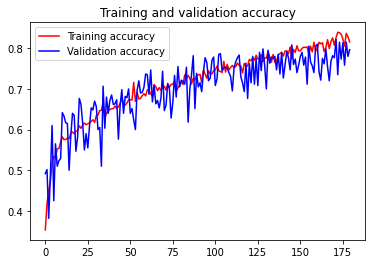

<Figure size 432x288 with 0 Axes>

In [37]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()



plt.show()

Hence, we can say that the model performed well with the accuracy of [ 84% ] approx.


## 8. Testing the Model
Taking pictures from the validation set to test the model

Saving images416.jpg to images416.jpg
Saving download.jpeg to download (1).jpeg
Saving abyssinian-ap-04b8vi-335.jpg to abyssinian-ap-04b8vi-335.jpg
Saving 961216efbb699a46340ceadbba2053ee.jpg to 961216efbb699a46340ceadbba2053ee.jpg


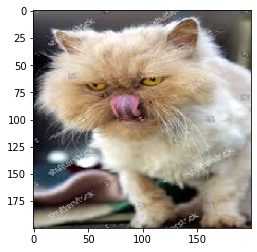

images416.jpg
[[0. 0. 1. 0.]]
It is a Persian Cat


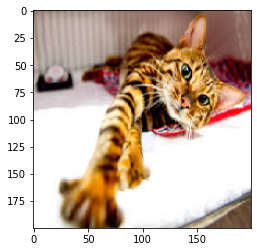

download.jpeg
[[0. 0. 0. 1.]]
It is a Toyger Cat


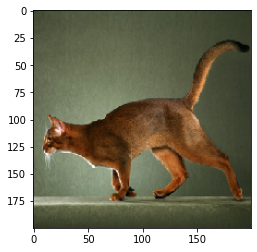

abyssinian-ap-04b8vi-335.jpg
[[1. 0. 0. 0.]]
It is an Abyssian Cat


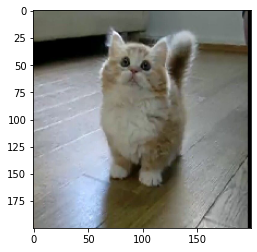

961216efbb699a46340ceadbba2053ee.jpg
[[0.0000000e+00 1.0000000e+00 4.2481362e-14 0.0000000e+00]]
It is a Munchkin Cat


In [44]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

 
  plt.imshow(img)

  plt.show()

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

  for i in classes:
    if classes[0][0]==1:
      print('It is an Abyssian Cat')
    elif classes[0][1]==1:
      print('It is a Munchkin Cat')
    elif classes[0][2]==1:
      print('It is a Persian Cat')
    elif classes[0][3]==1:
      print('It is a Toyger Cat')

## 9.1 Saving the model

In [33]:
 
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 

 

 


Saved model to disk


## 9.2 Load saved model (later) 

In [3]:
!pip install h5py
import tensorflow as tf
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Defaulting to user installation because normal site-packages is not writeable
Loaded model from disk


In [4]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 21, 21, 64)       

## 10. Conclusion 
Finally we can say that the model performed really well and was able to predict each breed very well using the CNN with.